In [45]:
"""
------------------------------------------------------------------------------
About
In this data analysis, the number and proportion of female and male street names
is calculated for each admin area.

The percentage of female street names represents the proportion of female street 
names compared to the total number of both female and male street names.
------------------------------------------------------------------------------
"""

'\n------------------------------------------------------------------------------\nAbout\nIn this data analysis, the number and proportion of female and male street names\nis calculated for each admin area.\n\nThe percentage of female street names represents the proportion of female street \nnames compared to the total number of both female and male street names.\n------------------------------------------------------------------------------\n'

In [46]:
"""
------------------------------------------------------------------------------
Libraries
------------------------------------------------------------------------------
"""

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [47]:
"""
------------------------------------------------------------------------------
Load GeoJson files
------------------------------------------------------------------------------
"""

admin_areas = gpd.read_file("../data/raw/Prognoseräume.json")

df_streets_gender = gpd.read_file("../data/raw/ways.geojson")

In [48]:
"""
------------------------------------------------------------------------------
Data exploration
------------------------------------------------------------------------------
"""

df_streets_gender.shape

(59205, 6)

In [49]:
df_streets_gender.isna().sum()

name            0
wikidata    39712
gender      40068
source       4897
details      4897
geometry        0
dtype: int64

In [50]:
df_streets_gender.iloc[0]

name                                     Ursula-Goetze-Straße
wikidata                                                 None
gender                                                      F
source                                               wikidata
details     { "wikidata": "Q108809", "person": true, "gend...
geometry    LINESTRING (13.531363 52.4926293, 13.5313613 5...
Name: 0, dtype: object

In [51]:
df_streets_gender[df_streets_gender["name"]== "Rose-Scheuer-Karpin-Straße"]

,name,wikidata,gender,source,details,geometry
6846,Rose-Scheuer-Karpin-Straße,Q117319767,F,wikidata,"{ ""wikidata"": ""Q117319813"", ""person"": true, ""g...","LINESTRING (13.51217 52.64257, 13.51369 52.643..."
16743,Rose-Scheuer-Karpin-Straße,Q117319767,F,wikidata,"{ ""wikidata"": ""Q117319813"", ""person"": true, ""g...","LINESTRING (13.51536 52.6438, 13.51539 52.6437..."


In [52]:
df_streets_gender["gender"].value_counts()

gender
M     17394
F      1726
+        14
FX        3
Name: count, dtype: int64

In [53]:
#subset female/male

fm = ["F", "M"]

df_streets_fm = df_streets_gender[df_streets_gender["gender"].isin(fm)]

df_streets_fm.head()

,name,wikidata,gender,source,details,geometry
0,Ursula-Goetze-Straße,None,F,wikidata,"{ ""wikidata"": ""Q108809"", ""person"": true, ""gend...","LINESTRING (13.53136 52.49263, 13.53136 52.492..."
6,Michael-Brückner-Straße,None,M,wikidata,"{ ""wikidata"": ""Q1927076"", ""person"": true, ""gen...","LINESTRING (13.51476 52.45303, 13.51528 52.45267)"
8,Jafféstraße,Q22287975,M,wikidata,"{ ""wikidata"": ""Q817940"", ""person"": true, ""gend...","LINESTRING (13.26152 52.50771, 13.26165 52.507..."
12,Liebknechtbrücke,None,M,wikidata,"{ ""wikidata"": ""Q75886"", ""person"": true, ""gende...","LINESTRING (13.40264 52.51893, 13.40197 52.51867)"
15,Alte Jafféstraße,None,M,wikidata,"{ ""wikidata"": ""Q817940"", ""person"": true, ""gend...","LINESTRING (13.27354 52.4999, 13.27342 52.4999..."


In [54]:
df_streets_fm.shape

(19120, 6)

In [55]:
len(df_streets_fm["name"].unique())

3384

In [56]:
df_streets_fm.dtypes

name          object
wikidata      object
gender        object
source        object
details       object
geometry    geometry
dtype: object

In [57]:
df_streets_fm.isna().sum()

name            0
wikidata    12197
gender          0
source          0
details         0
geometry        0
dtype: int64

In [58]:
admin_areas.head()

,id,pgr_id,pgr_name,bez,finhalt,stand,geometry
0,c_lor_pgr_2021.0370,0370,Südlicher Prenzlauer Berg,03 - Pankow,3.031117e+06,01.01.2021,"MULTIPOLYGON (((13.41975 52.52555, 13.42016 52..."
1,c_lor_pgr_2021.0220,0220,Kreuzberg Süd,02 - Friedrichshain-Kreuzberg,4.746309e+06,01.01.2021,"MULTIPOLYGON (((13.40772 52.48875, 13.40789 52..."
2,c_lor_pgr_2021.0760,0760,Marienfelde / Lichtenrade,07 - Tempelhof-Schöneberg,1.919254e+07,01.01.2021,"MULTIPOLYGON (((13.35912 52.4199, 13.35902 52...."
3,c_lor_pgr_2021.0520,0520,Wilhelmstadt / Staaken,05 - Spandau,2.301526e+07,01.01.2021,"MULTIPOLYGON (((13.15724 52.50162, 13.15726 52..."
4,c_lor_pgr_2021.0330,0330,Nördliches Weißensee,03 - Pankow,2.222540e+07,01.12.2021,"MULTIPOLYGON (((13.43357 52.58232, 13.43362 52..."


In [59]:
#Check for empty or invalid geometries
print(f"Empty geometry in df_streets_fm: {len(df_streets_fm[df_streets_fm.is_empty])}")
print(f"Invalid geometry in df_streets_fm: {len(df_streets_fm[~df_streets_fm.is_valid])}")

Empty geometry in df_streets_fm: 0
Invalid geometry in df_streets_fm: 0


In [60]:
"""
------------------------------------------------------------------------------
CRS
------------------------------------------------------------------------------
"""

df_streets_fm.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
#Ensure both GeoDataFrames have the same CRS 
if admin_areas.crs != df_streets_fm.crs:
    df_Baeume = df_streets_fm.to_crs(admin_areas.crs)

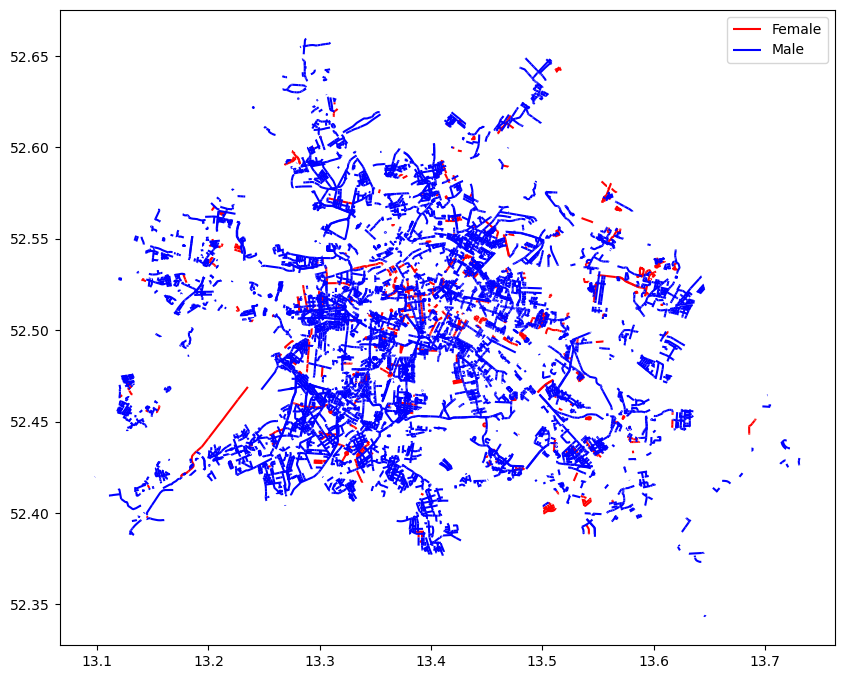

In [62]:
#Plot female and male street names
fig, ax = plt.subplots(figsize=(10, 10))

df_streets_fm[df_streets_fm["gender"] == "F"].plot(ax=ax, color="red", label="Female") 
df_streets_fm[df_streets_fm["gender"] == "M"].plot(ax=ax, color="blue", label="Male")

plt.legend()
plt.show()

In [63]:
# #female/male streets SVG
# fig, ax = plt.subplots(figsize=(10, 10))

# df_streets_fm[df_streets_fm["gender"] == "F"].plot(ax=ax, color="red", label="Female") 
# df_streets_fm[df_streets_fm["gender"] == "M"].plot(ax=ax, color="blue", label="Male")
# plt.legend()
# ax.set_axis_off()

# fig.savefig("intersections_f_m_streets_1.svg", format="svg")

In [64]:
df_streets_fm["gender"].value_counts()

gender
M    17394
F     1726
Name: count, dtype: int64

In [65]:
"""
------------------------------------------------------------------------------
Functions: 
female street names
male street names
------------------------------------------------------------------------------
"""

def calculate_f_streets(admin_area, df_streets_fm):
    #find intersections between the street dataframe and admin areas
    intersections = df_streets_fm[df_streets_fm.intersects(admin_area.geometry)]
    
    #Count the unique female street names in the intersections
    unique_f_streets = intersections[intersections["gender"] == "F"]["name"].nunique()
    
    print(f"Admin Area: {admin_area["pgr_name"]}, Unique_f_streets: {unique_f_streets}")
    
    return unique_f_streets


def calculate_m_streets(admin_area, df_streets_fm):
    #find intersections between the street dataframe and admin areas
    intersections = df_streets_fm[df_streets_fm.intersects(admin_area.geometry)]
    
    #Count the unique female street names in the intersections
    unique_m_streets = intersections[intersections["gender"] == "M"]["name"].nunique()
    
    print(f"Admin Area: {admin_area["pgr_name"]}, Unique_m_streets: {unique_m_streets}")
    
    return unique_m_streets


In [66]:
# #example intersection geojson
# intersections_f_streets_1 = df_streets_fm[df_streets_fm.intersects(admin_areas.iloc[0].geometry)]

# intersections_f_streets_1.to_file("intersections_f_streets_adminArea1.geojson")

# #Transform geojson into svg
# fig, ax = plt.subplots()
# intersections_f_streets_1.plot(ax=ax)
# ax.set_axis_off()

# fig.savefig("intersections_f_streets_1.svg", format="svg")

In [67]:
#Test
intersections = df_streets_fm[df_streets_fm.intersects(admin_areas.iloc[0].geometry)]
intersections[intersections["gender"] == "F"]["name"].nunique()

7

In [68]:
intersections[intersections["gender"] == "M"]["name"].nunique()

25

In [69]:
df_streets_fm.geometry.head()

0     LINESTRING (13.53136 52.49263, 13.53136 52.492...
6     LINESTRING (13.51476 52.45303, 13.51528 52.45267)
8     LINESTRING (13.26152 52.50771, 13.26165 52.507...
12    LINESTRING (13.40264 52.51893, 13.40197 52.51867)
15    LINESTRING (13.27354 52.4999, 13.27342 52.4999...
Name: geometry, dtype: geometry

In [70]:
#Calculation of unique_f_streets and unique_m_streets for each administrative area
admin_areas["unique_f_streets"] = admin_areas.apply(
    lambda row: calculate_f_streets(row, df_streets_fm), axis=1
)

admin_areas["unique_m_streets"] = admin_areas.apply(
    lambda row: calculate_m_streets(row, df_streets_fm), axis=1
)

#Display the results as a DataFrame
admin_areas[["pgr_id", "pgr_name", "unique_f_streets", "unique_m_streets"]].head(20)

Admin Area: Südlicher Prenzlauer Berg, Unique_f_streets: 7
Admin Area: Kreuzberg Süd, Unique_f_streets: 4
Admin Area: Marienfelde / Lichtenrade, Unique_f_streets: 5
Admin Area: Wilhelmstadt / Staaken, Unique_f_streets: 3
Admin Area: Nördliches Weißensee, Unique_f_streets: 4
Admin Area: Tempelhof, Unique_f_streets: 7
Admin Area: Lichtenberg Nord, Unique_f_streets: 3
Admin Area: Lichtenberg Mitte, Unique_f_streets: 9
Admin Area: Hellersdorf, Unique_f_streets: 16
Admin Area: Buch, Unique_f_streets: 3
Admin Area: Hohenschönhausen Nord, Unique_f_streets: 5
Admin Area: Kaulsdorf/Mahlsdorf, Unique_f_streets: 3
Admin Area: Treptow-Köpenick 1, Unique_f_streets: 3
Admin Area: Tegel, Unique_f_streets: 5
Admin Area: Mariendorf, Unique_f_streets: 0
Admin Area: Friedrichshain Ost, Unique_f_streets: 7
Admin Area: Nördlicher Prenzlauer Berg, Unique_f_streets: 10
Admin Area: Charlottenburg Nord, Unique_f_streets: 4
Admin Area: Lankwitz/Lichterfelde Ost, Unique_f_streets: 13
Admin Area: Schöneberg Nord,

,pgr_id,pgr_name,unique_f_streets,unique_m_streets
0,0370,Südlicher Prenzlauer Berg,7,25
1,0220,Kreuzberg Süd,4,68
2,0760,Marienfelde / Lichtenrade,5,132
3,0520,Wilhelmstadt / Staaken,3,88
4,0330,Nördliches Weißensee,4,23
5,0740,Tempelhof,7,94
6,1130,Lichtenberg Nord,3,49
7,1140,Lichtenberg Mitte,9,40
8,1020,Hellersdorf,16,30
9,0310,Buch,3,18


In [71]:
#Merge dataframes

df_streets = admin_areas[["pgr_id", "pgr_name", "unique_f_streets", "unique_m_streets"]]

df_streets.head()

,pgr_id,pgr_name,unique_f_streets,unique_m_streets
0,0370,Südlicher Prenzlauer Berg,7,25
1,0220,Kreuzberg Süd,4,68
2,0760,Marienfelde / Lichtenrade,5,132
3,0520,Wilhelmstadt / Staaken,3,88
4,0330,Nördliches Weißensee,4,23


In [72]:
#Total street count and female streets in percent
df_streets["unique_streets_count"] = df_streets["unique_f_streets"] + df_streets["unique_m_streets"]
df_streets["f_percent"] = (df_streets["unique_f_streets"] / df_streets["unique_streets_count"]).round(3) *100

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_6812/57088691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_streets["unique_streets_count"] = df_streets["unique_f_streets"] + df_streets["unique_m_streets"]
/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_6812/57088691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_streets["f_percent"] = (df_streets["unique_f_streets"] / df_streets["unique_streets_count"]).round(3) *100


In [73]:
#sort descending
df_streets.sort_values(by="unique_f_streets", ascending=False, inplace =True)
df_streets

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_6812/1948108861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_streets.sort_values(by="unique_f_streets", ascending=False, inplace =True)


,pgr_id,pgr_name,unique_f_streets,unique_m_streets,unique_streets_count,f_percent
24,0110,Zentrum,49,166,215,22.8
31,0120,Moabit,22,63,85,25.9
45,0630,Zehlendorf Süd/Lichterfelde West,17,133,150,11.3
51,0430,Charlottenburg Zentrum,16,124,140,11.4
8,1020,Hellersdorf,16,30,46,34.8
30,0840,Buckow Nord/Rudow,14,29,43,32.6
33,1150,Lichtenberg Süd,14,39,53,26.4
18,0620,Lankwitz/Lichterfelde Ost,13,96,109,11.9
46,0340,Südliches Pankow,12,80,92,13.0
37,0510,Spandau Mitte / Nord,11,75,86,12.8


In [74]:
df_streets["f_percent"].min()

0.0

In [75]:
df_streets["f_percent"].max()

34.8

In [76]:
#CSV
df_streets.to_csv("../data/csv/femaleStreetNames.csv", index = False)